In [1]:
#Note - run cells in the below order (and do not re-run them individually)
#     - place csv files in the same folder as the jupyter notebook  

import csv #importing required libraries
from collections import defaultdict
import matplotlib.pyplot as plt
import numpy as np




with open('clean_monthly_data.csv', newline='') as csvfile: #import monthly data as nested dictionary
    
    APMC = csv.reader(csvfile)
    
    #initialise dictionary to store the fluctuation in price for each commodity for each year
    APMC_fluctuation = defaultdict(lambda: defaultdict(lambda: defaultdict(lambda: defaultdict(lambda: defaultdict(lambda: defaultdict(lambda: defaultdict(int)))))))
    
    APMC_data = defaultdict(lambda: defaultdict(lambda: defaultdict(lambda: defaultdict(lambda: defaultdict(lambda: defaultdict(lambda: defaultdict(int)))))))
    
    
    #set containing the combination of districts, names and commodities present in dataset
    APMC_district_name_product = set()

    
    i=0
    for row in APMC:
        if i > 0: #do not import first row (they are the names of the columns)
            
            #populate dictionary with district, name and commodity triplets
            APMC_district_name_product.add((row[9].lower(),row[0].lower(),row[1].lower()))
            
            #populate the fluctuation dictionary with the difference between the max and min price for each month in each year
            APMC_fluctuation[row[10].lower()][row[9].lower()][row[0].lower()][row[1].lower()][int(row[2])][int(row[3])] = int(row[6]) - int(row[5])

            a=[]
            for k in range(4,8):
            
                a.append(int(row[k]))
            
            APMC_data[row[10].lower()][row[9].lower()][row[0].lower()][row[1].lower()][int(row[2])][int(row[3])] = a
            
        i+=1
        
        


In [2]:

#initialise new dictionary to store the average fluctuation in prices for each year (i.e. compute average over months)
APMC_average_fluctuation = defaultdict(lambda: defaultdict(lambda: defaultdict(lambda: defaultdict(lambda: defaultdict(lambda: defaultdict(int))))))

#array to store the values of these average fluctuations, 
#this will be useful to select the commodities with the highest fluctuation value

values=[]

#iterate over commodities
for dist_name_prod in APMC_district_name_product:
    
    years = list(APMC_fluctuation['maharashtra'][dist_name_prod[0]][dist_name_prod[1]][dist_name_prod[2]].keys())
    
    #iterate over years for which we have values for that specific commodity
    for year in sorted(years):
    
        months = list(APMC_fluctuation['maharashtra'][dist_name_prod[0]][dist_name_prod[1]][dist_name_prod[2]][year].keys())
        
        var = 0
        
        #iterate over months for which we have values for that specific commodity
        for month in sorted(months):
            
            #accumulate the value of the difference between max and min price over months to compute the mean
            var +=  APMC_fluctuation['maharashtra'][dist_name_prod[0]][dist_name_prod[1]][dist_name_prod[2]][year][month]
        
        #compute the mean fluctuation
        APMC_average_fluctuation['maharashtra'][dist_name_prod[0]][dist_name_prod[1]][dist_name_prod[2]][year] = var/len(months)
        
        #append the mean fluctuation to the values array
        values.append(var/len(months))


#take the top 5% of the fluctuation values, we do this by finding a threshold for the value of the fluctuation
#only commodities with fluctuations above this value will be stored

top_five_percent_no = int(len(values) * 0.05)

top_five_percent = sorted(values, reverse=True)[:top_five_percent_no]

threshold = min(top_five_percent)
        
        

In [3]:
#write the commodities with high fluctuations to a new csv file called 'flagging_high_fluctuation.csv'

with open('flagging_high_fluctuation.csv', mode='w', newline='') as clean_data:
    
    clean_data_writer = csv.writer(clean_data, delimiter=',', quotechar='"', quoting=csv.QUOTE_NONE)
    
    #first row contains the column titles
    clean_data_writer.writerow(['APMC', 'Commodity','year','average fluctuation','district_name', 'state_name'])
    
    
    #iterate over commodities, years and months 
    for dist_name_prod in APMC_district_name_product:
        
        years = list(APMC_average_fluctuation['maharashtra'][dist_name_prod[0]][dist_name_prod[1]][dist_name_prod[2]].keys())
        
        for year in sorted(years):
            
            #only list the commodities whose fluctuation value is greater than the threshold
            if APMC_average_fluctuation['maharashtra'][dist_name_prod[0]][dist_name_prod[1]][dist_name_prod[2]][year] >= threshold:
                
                #populate the dictionary using the structure dictated by the title row 
                clean_data_writer.writerow([dist_name_prod[1], dist_name_prod[2], year,APMC_average_fluctuation['maharashtra'][dist_name_prod[0]][dist_name_prod[1]][dist_name_prod[2]][year] ,dist_name_prod[0], 'maharashtra'])
            
            
            

Text(0,0.5,'Price')

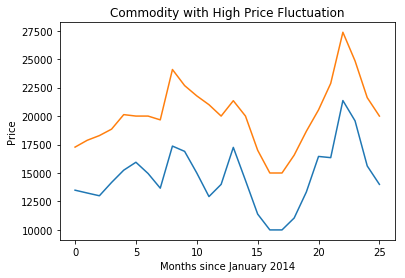

In [4]:
#plotting time series to show the difference in price fluctuation

x1=[]
x2=[]

years = list(APMC_data['maharashtra']['mumbai']['mumbai']['cummin'].keys())
    
for year in sorted(years):
    
    months = list(APMC_data['maharashtra']['mumbai']['mumbai']['cummin'][year].keys())
        
    
    for month in sorted(months):
            
        x1.append(APMC_data['maharashtra']['mumbai']['mumbai']['cummin'][year][month][1])
        x2.append(APMC_data['maharashtra']['mumbai']['mumbai']['cummin'][year][month][2])
      
plt.figure(1)
plt.plot(x1)
plt.plot(x2)
plt.title('Commodity with High Price Fluctuation')
plt.xlabel('Months since January 2014')
plt.ylabel('Price')




Text(0,0.5,'Price')

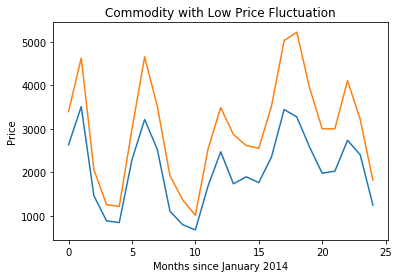

In [5]:
y1=[]
y2=[]

years = list(APMC_data['maharashtra']['aurangabad']['aurangabad']['lemon'].keys())
    
for year in sorted(years):
    
    months = list(APMC_data['maharashtra']['aurangabad']['aurangabad']['lemon'][year].keys())
        
    
    for month in sorted(months):
            
        y1.append(APMC_data['maharashtra']['aurangabad']['aurangabad']['lemon'][year][month][1])
        y2.append(APMC_data['maharashtra']['aurangabad']['aurangabad']['lemon'][year][month][2])
        
plt.figure(2)
plt.plot(y1)
plt.plot(y2)
plt.title('Commodity with Low Price Fluctuation')
plt.xlabel('Months since January 2014')
plt.ylabel('Price')
